<a href="https://colab.research.google.com/github/zharfanw/zhar_hfss_pyhelper/blob/main/BigPLusAirgap_DataDesign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
path_analysis='/content/drive/MyDrive/MyNotebook/AntennaAnalysis/'

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
phase_dat = pd.read_csv(path_analysis + 'phaseDeg_5layerbigplusairgp.csv')
phase_dat

,w_ind[mm],the_L[mm],cang_deg_val(S(FloquetPort2:1,FloquetPort1:1))
0,0.2,0.2,37.9380,NaN
1,0.4,0.2,35.9768,NaN
2,0.6,0.2,34.6676,NaN
3,0.8,0.2,31.2390,NaN
4,1.0,0.2,26.4694,NaN
...,...,...,...,...
248,1.4,2.4,-152.9240,NaN
249,1.6,2.4,-167.8690,NaN
250,1.8,2.4,-177.8820,NaN
251,2.0,2.4,-186.6370,NaN


In [55]:
current_columns = phase_dat.columns

# Get the name of the third column (index 2)
third_col_name = current_columns[2]

# Rename the third column to 'phasedeg'
# The fourth column will not be dropped this time.
phase_dat = phase_dat.rename(columns={third_col_name: 'phasedeg'})

print("Updated phase_dat DataFrame head:")
phase_dat.head()

Updated phase_dat DataFrame head:


,w_ind[mm],the_L[mm],phasedeg,FloquetPort1:1))
0,0.2,0.2,37.9380,NaN
1,0.4,0.2,35.9768,NaN
2,0.6,0.2,34.6676,NaN
3,0.8,0.2,31.2390,NaN
4,1.0,0.2,26.4694,NaN


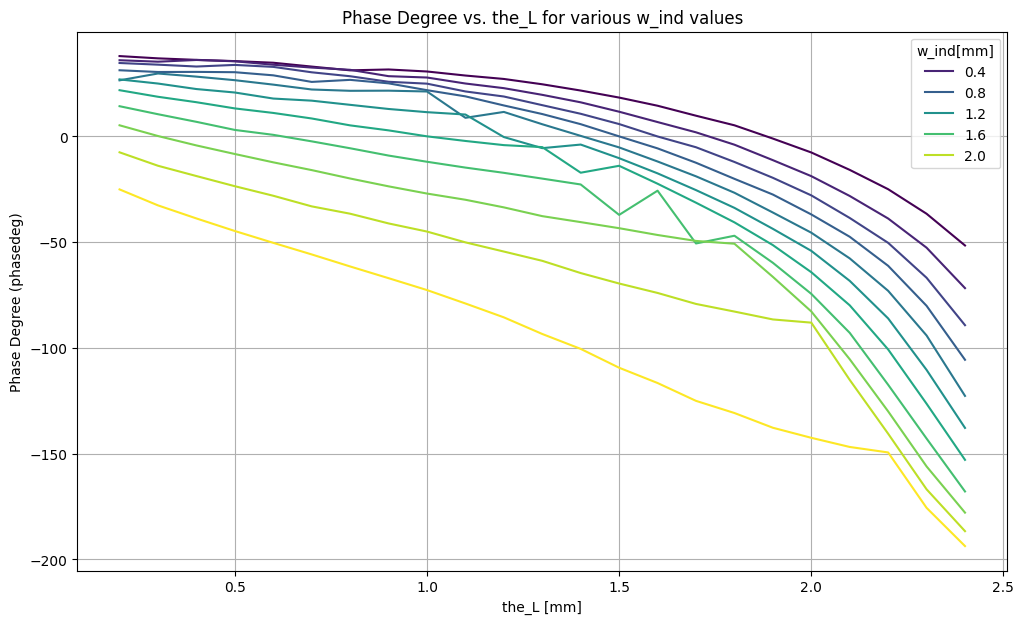

In [56]:
plt.figure(figsize=(12, 7))
sns.lineplot(x='the_L[mm]', y='phasedeg', data=phase_dat, hue='w_ind[mm]', palette='viridis')
plt.title('Phase Degree vs. the_L for various w_ind values')
plt.xlabel('the_L [mm]')
plt.ylabel('Phase Degree (phasedeg)')
plt.grid(True)
plt.legend(title='w_ind[mm]')
plt.show()

Plot di atas menampilkan bagaimana `phasedeg` berubah seiring dengan perubahan `the_L[mm]`. Setiap garis berwarna mewakili nilai `w_ind[mm]` yang berbeda, memungkinkan kita untuk melihat tren `phasedeg` pada berbagai kombinasi `the_L[mm]` dan `w_ind[mm]`.

In [57]:
gain_dat = pd.read_csv(path_analysis + 'dbgain_5layerbigplusairgp.csv')
gain_dat

,the_L [mm],w_ind [mm],Freq [GHz],"dB(S(FloquetPort2:1,FloquetPort1:1)) []"
0,0.2,0.2,35,-0.009046
1,0.2,0.2,36,-0.011646
2,0.2,0.2,37,-0.014564
3,0.2,0.2,38,-0.017699
4,0.2,0.2,39,-0.020941
...,...,...,...,...
2778,2.4,2.2,41,-0.373378
2779,2.4,2.2,42,-6.374815
2780,2.4,2.2,43,-12.731352
2781,2.4,2.2,44,-17.798582


In [58]:
# Get the current name of the fourth column in gain_dat
current_gain_col_name = gain_dat.columns[3]

# Rename the fourth column to 'gain_db'
gain_dat = gain_dat.rename(columns={current_gain_col_name: 'gain_db'})

print("Updated gain_dat DataFrame head:")
display(gain_dat.head())

Updated gain_dat DataFrame head:


,the_L [mm],w_ind [mm],Freq [GHz],gain_db
0,0.2,0.2,35,-0.009046
1,0.2,0.2,36,-0.011646
2,0.2,0.2,37,-0.014564
3,0.2,0.2,38,-0.017699
4,0.2,0.2,39,-0.020941


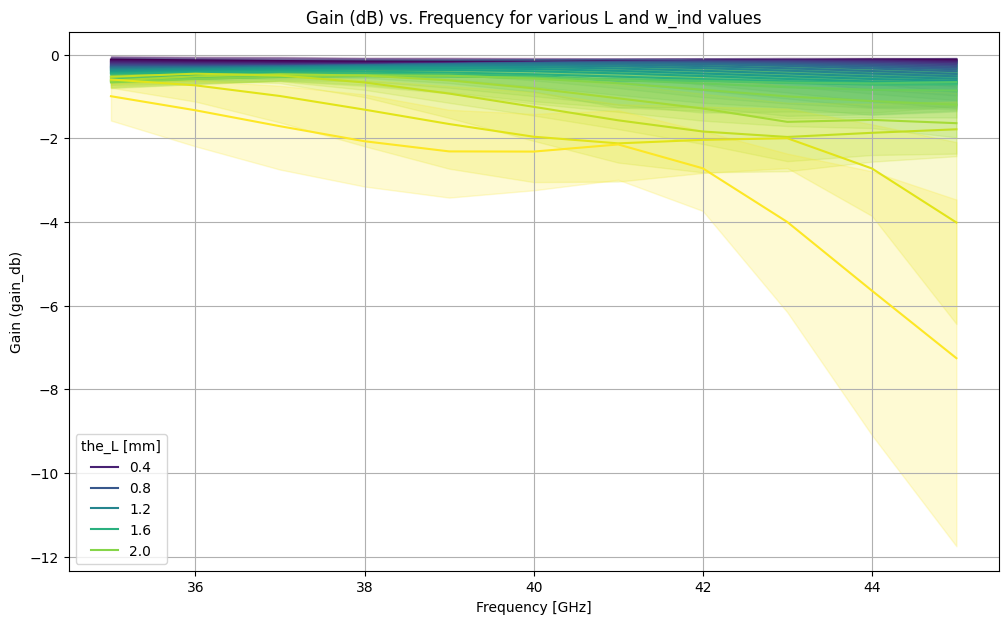

In [59]:
# Create the plot: Gain vs. Frequency
plt.figure(figsize=(12, 7))
sns.lineplot(x='Freq [GHz]', y='gain_db', data=gain_dat, hue='the_L [mm]', palette='viridis')
plt.title('Gain (dB) vs. Frequency for various L and w_ind values')
plt.xlabel('Frequency [GHz]')
plt.ylabel('Gain (gain_db)')
plt.grid(True)
plt.legend(title='the_L [mm]')
plt.show()

Updated phase_dat DataFrame head after conditional subtraction:


,w_ind[mm],the_L[mm],phasedeg,FloquetPort1:1))
0,0.2,0.2,-322.0620,NaN
1,0.4,0.2,-324.0232,NaN
2,0.6,0.2,-325.3324,NaN
3,0.8,0.2,-328.7610,NaN
4,1.0,0.2,-333.5306,NaN


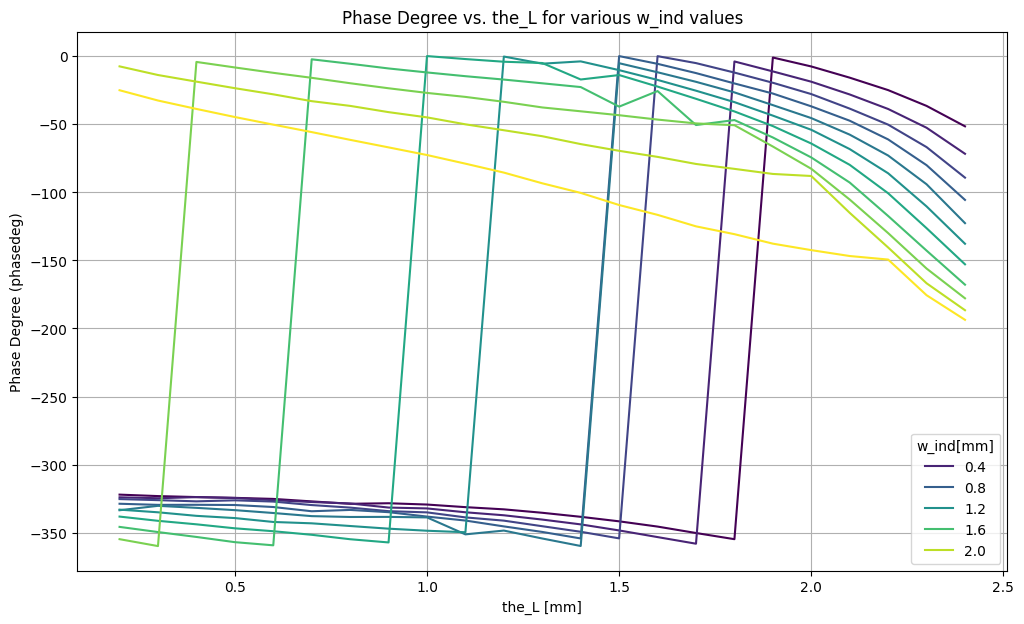

In [60]:
# Identify groups (the_L[mm], w_ind[mm]) that contain at least one positive phasedeg
has_positive_phasedeg_in_group = phase_dat.groupby(['the_L[mm]', 'w_ind[mm]'])['phasedeg'].transform(lambda x: (x > 0).any())

# Apply the condition: if the group has positive phasedeg AND the current phasedeg is positive
condition_to_subtract = (has_positive_phasedeg_in_group) & (phase_dat['phasedeg'] > 0)

# Subtract 360 from phasedeg for rows meeting the condition
phase_dat.loc[condition_to_subtract, 'phasedeg'] = phase_dat.loc[condition_to_subtract, 'phasedeg'] - 360

print("Updated phase_dat DataFrame head after conditional subtraction:")
display(phase_dat.head())

plt.figure(figsize=(12, 7))
sns.lineplot(x='the_L[mm]', y='phasedeg', data=phase_dat, hue='w_ind[mm]', palette='viridis')
plt.title('Phase Degree vs. the_L for various w_ind values')
plt.xlabel('the_L [mm]')
plt.ylabel('Phase Degree (phasedeg)')
plt.grid(True)
plt.legend(title='w_ind[mm]')
plt.show()

In [61]:
import numpy as np

# Sort the DataFrame by 'w_ind[mm]' and 'the_L[mm]' to ensure correct unwrapping order
phase_dat_sorted = phase_dat.sort_values(by=['w_ind[mm]', 'the_L[mm]'])

# Apply np.unwrap to 'phasedeg' for each 'w_ind[mm]' group
# np.unwrap expects radians, so convert degrees to radians, unwrap, then convert back to degrees
phase_dat_sorted['phasedeg_unwrapped'] = phase_dat_sorted.groupby('w_ind[mm]')['phasedeg'].transform(lambda x: np.degrees(np.unwrap(np.radians(x))))

print("Updated phase_dat DataFrame head with unwrapped phase:")
display(phase_dat_sorted.head())

Updated phase_dat DataFrame head with unwrapped phase:


,w_ind[mm],the_L[mm],phasedeg,FloquetPort1:1)),phasedeg_unwrapped
0,0.2,0.2,-322.0620,NaN,-322.0620
11,0.2,0.3,-323.1361,NaN,-323.1361
22,0.2,0.4,-323.8551,NaN,-323.8551
33,0.2,0.5,-324.4342,NaN,-324.4342
44,0.2,0.6,-325.2083,NaN,-325.2083


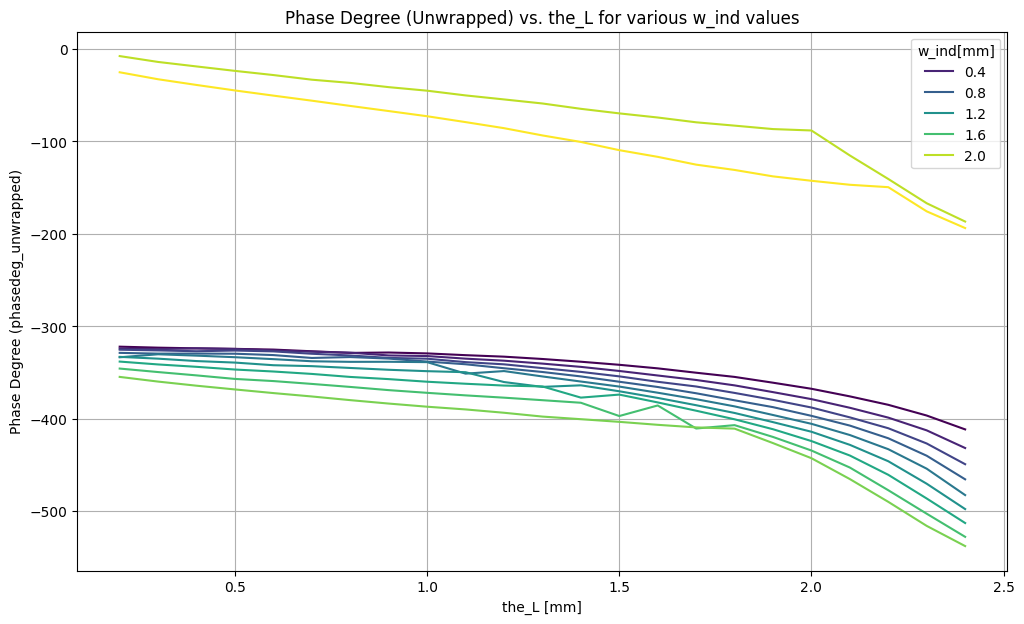

In [62]:
plt.figure(figsize=(12, 7))
sns.lineplot(x='the_L[mm]', y='phasedeg_unwrapped', data=phase_dat_sorted, hue='w_ind[mm]', palette='viridis')
plt.title('Phase Degree (Unwrapped) vs. the_L for various w_ind values')
plt.xlabel('the_L [mm]')
plt.ylabel('Phase Degree (phasedeg_unwrapped)')
plt.grid(True)
plt.legend(title='w_ind[mm]')
plt.show()

In [63]:
import plotly.express as px

# Create an interactive line plot using Plotly Express
fig_interactive = px.line(
    phase_dat_sorted,
    x='the_L[mm]',
    y='phasedeg_unwrapped',
    color='w_ind[mm]',
    title='Interactive Phase Degree (Unwrapped) vs. the_L for various w_ind values',
    labels={'the_L[mm]': 'the_L [mm]', 'phasedeg_unwrapped': 'Phase Degree (phasedeg_unwrapped)', 'w_ind[mm]': 'w_ind[mm]'}
)

# Update layout for better readability (optional)
fig_interactive.update_layout(xaxis_title='the_L [mm]', yaxis_title='Phase Degree (phasedeg_unwrapped)', legend_title='w_ind[mm]')

# Show the interactive plot
fig_interactive.show()

Plot di atas sekarang adalah plot interaktif. Anda bisa mengarahkan kursor (hover) ke garis untuk melihat detail nilai, memperbesar (zoom in/out), dan menggeser (pan) grafik. Ini memberikan kemampuan eksplorasi data yang lebih baik dibandingkan plot statis.

Plot di atas menunjukkan `phasedeg` yang telah di-unwrapped terhadap `the_L[mm]`. Dengan menerapkan fungsi unwrapping, kita dapat melihat tren fase secara lebih mulus tanpa adanya lompatan tiba-tiba, yang lebih representatif untuk perubahan fase yang berkelanjutan.

In [64]:
# Define the target range
min_val = -360
max_val = 0
range_size = max_val - min_val

# Apply the wrapping formula
# wrapped_x = min_val + (x - min_val) % range_size
phase_dat_sorted['phasedeg_wrapped'] = min_val + (phase_dat_sorted['phasedeg_unwrapped'] - min_val) % range_size

print("Updated phase_dat_sorted DataFrame head with wrapped phase:")
display(phase_dat_sorted.head())

Updated phase_dat_sorted DataFrame head with wrapped phase:


,w_ind[mm],the_L[mm],phasedeg,FloquetPort1:1)),phasedeg_unwrapped,phasedeg_wrapped
0,0.2,0.2,-322.0620,NaN,-322.0620,-322.0620
11,0.2,0.3,-323.1361,NaN,-323.1361,-323.1361
22,0.2,0.4,-323.8551,NaN,-323.8551,-323.8551
33,0.2,0.5,-324.4342,NaN,-324.4342,-324.4342
44,0.2,0.6,-325.2083,NaN,-325.2083,-325.2083


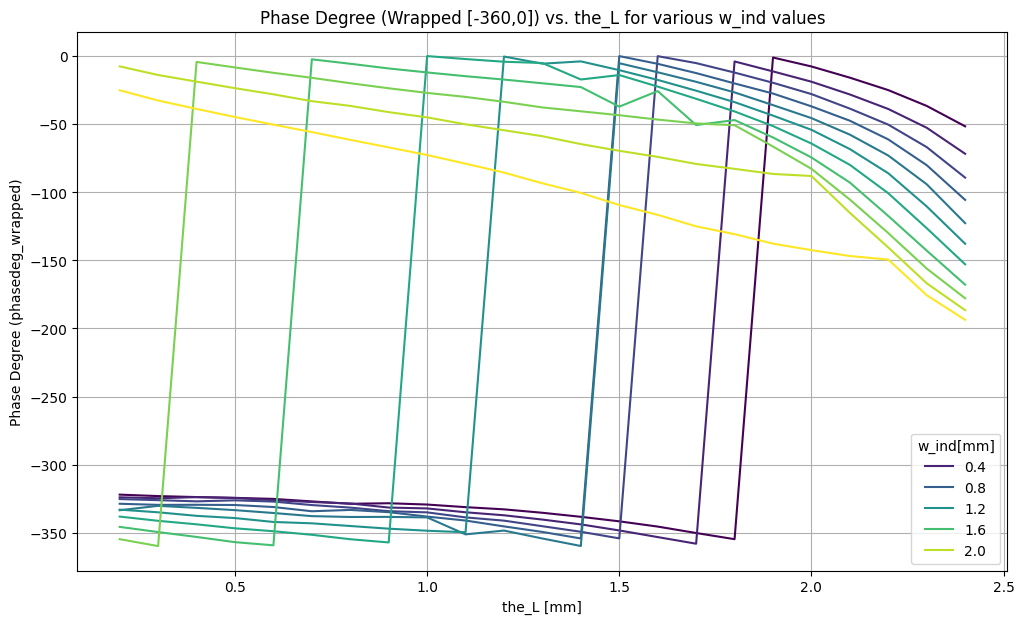

In [65]:
plt.figure(figsize=(12, 7))
sns.lineplot(x='the_L[mm]', y='phasedeg_wrapped', data=phase_dat_sorted, hue='w_ind[mm]', palette='viridis')
plt.title('Phase Degree (Wrapped [-360,0]) vs. the_L for various w_ind values')
plt.xlabel('the_L [mm]')
plt.ylabel('Phase Degree (phasedeg_wrapped)')
plt.grid(True)
plt.legend(title='w_ind[mm]')
plt.show()

Plot di atas menunjukkan `phasedeg` yang telah di-wrap ke dalam rentang `[-360, 0]` terhadap `the_L[mm]`. Ini berguna jika Anda ingin menjaga representasi fase dalam satu siklus 360 derajat tertentu, meskipun setelah proses unwrapping sebelumnya.

In [66]:
import plotly.express as px

# Create an interactive line plot using Plotly Express for the wrapped phase
fig_interactive_wrapped = px.line(
    phase_dat_sorted,
    x='the_L[mm]',
    y='phasedeg_wrapped',
    color='w_ind[mm]',
    title='Interactive Phase Degree (Wrapped [-360,0]) vs. the_L for various w_ind values',
    labels={'the_L[mm]': 'the_L [mm]', 'phasedeg_wrapped': 'Phase Degree (phasedeg_wrapped)', 'w_ind[mm]': 'w_ind[mm]'}
)

# Update layout for better readability (optional)
fig_interactive_wrapped.update_layout(xaxis_title='the_L [mm]', yaxis_title='Phase Degree (phasedeg_wrapped)', legend_title='w_ind[mm]')

# Show the interactive plot
fig_interactive_wrapped.show()

In [67]:
print("--- Data from phase_dat_sorted ---")
print("Unique w_ind[mm] in phase_dat_sorted:")
print(phase_dat_sorted['w_ind[mm]'].unique())
print(f"Range of w_ind[mm] in phase_dat_sorted: ({phase_dat_sorted['w_ind[mm]'].min()}, {phase_dat_sorted['w_ind[mm]'].max()})")
print("\nUnique the_L[mm] in phase_dat_sorted:")
print(phase_dat_sorted['the_L[mm]'].unique())
print(f"Range of the_L[mm] in phase_dat_sorted: ({phase_dat_sorted['the_L[mm]'].min()}, {phase_dat_sorted['the_L[mm]'].max()})")

print("\n--- Data from gain_dat ---")
print("Unique w_ind [mm] in gain_dat:")
print(gain_dat['w_ind [mm]'].unique())
print(f"Range of w_ind [mm] in gain_dat: ({gain_dat['w_ind [mm]'].min()}, {gain_dat['w_ind [mm]'].max()})")
print("\nUnique the_L [mm] in gain_dat:")
print(gain_dat['the_L [mm]'].unique())
print(f"Range of the_L [mm] in gain_dat: ({gain_dat['the_L [mm]'].min()}, {gain_dat['the_L [mm]'].max()})")

--- Data from phase_dat_sorted ---
Unique w_ind[mm] in phase_dat_sorted:
[0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2]
Range of w_ind[mm] in phase_dat_sorted: (0.2, 2.2)

Unique the_L[mm] in phase_dat_sorted:
[0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9
 2.  2.1 2.2 2.3 2.4]
Range of the_L[mm] in phase_dat_sorted: (0.2, 2.4)

--- Data from gain_dat ---
Unique w_ind [mm] in gain_dat:
[0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2]
Range of w_ind [mm] in gain_dat: (0.2, 2.2)

Unique the_L [mm] in gain_dat:
[0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9
 2.  2.1 2.2 2.3 2.4]
Range of the_L [mm] in gain_dat: (0.2, 2.4)


Output di atas menampilkan nilai unik dan rentang minimum-maksimum untuk kolom `w_ind[mm]` dan `the_L[mm]` dari kedua DataFrame (`phase_dat_sorted` dan `gain_dat`). Anda bisa membandingkan output ini secara langsung untuk melihat apakah ada perbedaan.

Plot di atas sekarang menampilkan `phasedeg` yang telah di-wrap ke rentang `[-360, 0]` dalam format interaktif. Anda dapat berinteraksi dengan grafik ini untuk eksplorasi data yang lebih detail, seperti zooming, panning, dan melihat detail nilai dengan hover.